In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Any results you write to the current directory are saved as output.

In [26]:
# open dataset
data_filepath = '../data/raw/yellow_tripdata_2018-05.csv'
dataset = pd.read_csv(data_filepath)

dataset['tpep_pickup_datetime'] = pd.to_datetime(dataset['tpep_pickup_datetime'])
dataset.set_index('tpep_pickup_datetime',inplace=True)

dataset.head()

,VendorID,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
tpep_pickup_datetime,,,,,,,,,,,,,,,,
2018-05-01 00:13:56,1,2018-05-01 00:22:46,1,1.6,1,N,230,50,1,8.0,0.5,0.5,1.85,0.0,0.3,11.15
2018-05-01 00:23:26,1,2018-05-01 00:29:56,1,1.7,1,N,263,239,1,7.5,0.5,0.5,2.00,0.0,0.3,10.80
2018-05-01 00:36:23,1,2018-05-01 00:48:26,2,2.6,1,N,239,152,1,12.0,0.5,0.5,1.00,0.0,0.3,14.30
2018-05-01 00:26:12,1,2018-05-01 00:27:05,1,0.0,1,N,145,145,1,2.5,0.5,0.5,9.63,0.0,0.3,13.43
2018-05-01 00:29:51,1,2018-05-01 00:30:02,1,0.0,1,N,145,145,2,2.5,0.5,0.5,0.00,0.0,0.3,3.80


In [42]:
passengers = dataset[['passenger_count']]

passengers.tail()

,passenger_count
tpep_pickup_datetime,
2018-05-31 23:25:13,2
2018-05-31 23:15:24,1
2018-05-31 23:46:26,1
2018-05-31 23:59:33,1
2018-05-31 23:27:40,1


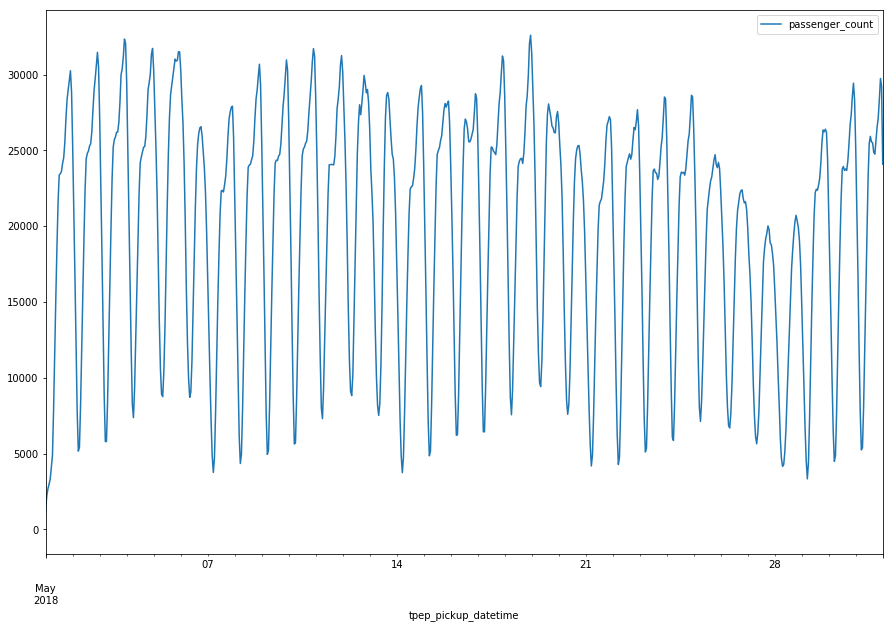

In [30]:
passengers.sort_values(by='tpep_pickup_datetime')
#display(passengers)
passengers.resample('60T').sum().rolling('360T').mean().plot(xlim=('2018-05-01 00:00:00','2018-05-31 23:59:59'), figsize=(15,10));

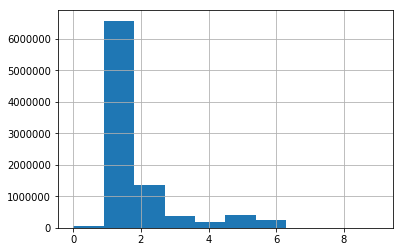

In [31]:
# passenger count per trip

dataset['passenger_count'].hist()

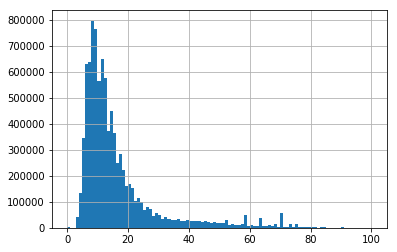

In [32]:
# total fare
dataset['total_amount'].hist(range=(0,100),bins=100)


In [43]:
weekday_sets = [None] * 7

for day_idx in range(0,7):
    weekday_sets[day_idx] = dataset[dataset.index.weekday==day_idx]


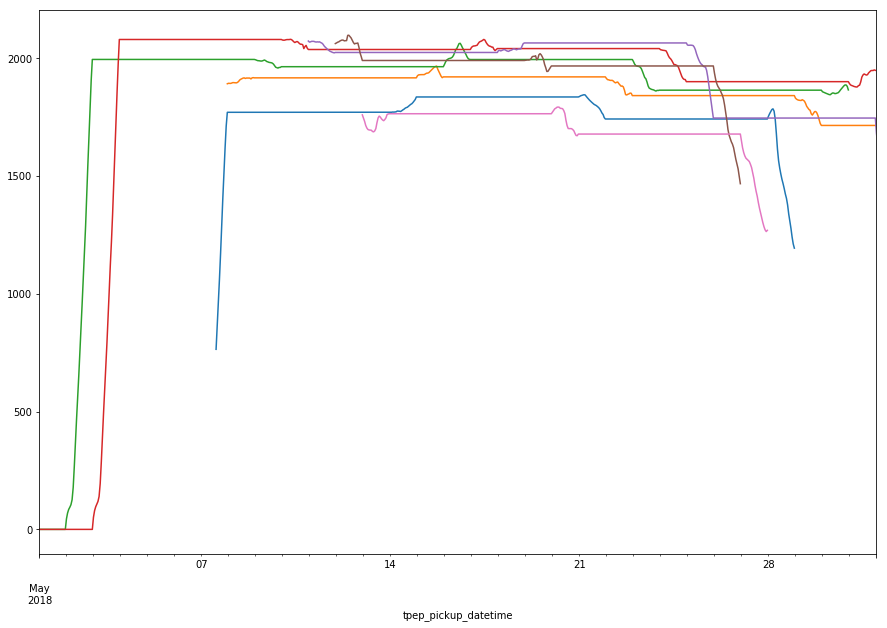

In [58]:
for day_idx in range(0,7):
    weekday_sets[day_idx]['RatecodeID'].resample('60T').sum().rolling(24*7).mean().plot(xlim=('2018-05-01 00:00:00','2018-05-31 23:59:59'), figsize=(15,10))
